# Pose Analyzer

## Integrantes

* Juan Sebastián Díaz
* Juan Sebastián Libreros

# Preprocesamiento de datos

Primero haremos el correcto procesamiento de los datos para poder crear un dataset robusto con el cual poder entrenar el modelo

In [30]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [31]:
data = pandas.read_csv('./dataset/metadata/pose_data.csv')

data.head(10)

,video,frame_idx,label,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,...,z_30,visibility_30,x_31,y_31,z_31,visibility_31,x_32,y_32,z_32,visibility_32
0,andres_caminar1.MOV,1,caminar,0.301972,0.477756,-0.193664,0.999985,0.295878,0.470828,-0.184601,...,0.121710,0.829021,0.555963,0.438278,0.058729,0.976784,0.554118,0.501604,0.045032,0.974213
1,andres_caminar1.MOV,2,caminar,0.301838,0.477256,-0.129946,0.999984,0.295870,0.470535,-0.120004,...,0.101112,0.826934,0.555721,0.438236,0.037273,0.977096,0.554111,0.513806,0.030807,0.974254
2,andres_caminar1.MOV,3,caminar,0.301795,0.477179,-0.132016,0.999982,0.295879,0.470511,-0.121953,...,0.090213,0.821883,0.555446,0.437672,0.039159,0.976732,0.553865,0.515678,0.019650,0.973607
3,andres_caminar1.MOV,4,caminar,0.301776,0.477158,-0.129659,0.999981,0.295891,0.470543,-0.119794,...,0.089286,0.820505,0.555415,0.437371,0.030130,0.976909,0.553863,0.517355,0.019333,0.973626
4,andres_caminar1.MOV,5,caminar,0.301736,0.477175,-0.131916,0.999980,0.295887,0.470698,-0.122057,...,0.089644,0.820248,0.555364,0.437042,0.032270,0.977305,0.554018,0.517730,0.018779,0.973943
5,andres_caminar1.MOV,6,caminar,0.301701,0.477188,-0.124873,0.999979,0.295883,0.470758,-0.115134,...,0.093152,0.819726,0.555350,0.437333,0.028065,0.977464,0.554161,0.518750,0.022909,0.974058
6,andres_caminar1.MOV,7,caminar,0.301702,0.477188,-0.127569,0.999979,0.295889,0.470763,-0.117938,...,0.094566,0.819804,0.555371,0.437514,0.028523,0.977765,0.554273,0.518797,0.024545,0.974306
7,andres_caminar1.MOV,8,caminar,0.301753,0.477189,-0.132511,0.999978,0.295932,0.470767,-0.122863,...,0.092279,0.818164,0.555597,0.437737,0.025724,0.977949,0.554484,0.519127,0.020917,0.974356
8,andres_caminar1.MOV,9,caminar,0.301854,0.477153,-0.137571,0.999977,0.296009,0.470759,-0.127995,...,0.093374,0.816152,0.555960,0.437884,0.028502,0.978277,0.554694,0.519677,0.020699,0.974530
9,andres_caminar1.MOV,10,caminar,0.301989,0.477111,-0.139037,0.999977,0.296090,0.470753,-0.129757,...,0.089436,0.812445,0.556203,0.438295,0.028044,0.978412,0.554988,0.519221,0.015136,0.974410


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11104 entries, 0 to 11103
Columns: 135 entries, video to visibility_32
dtypes: float64(132), int64(1), object(2)
memory usage: 11.4+ MB


In [33]:
#Removemos las columnas identificadoras que no aporta informacion relevante
data = data.drop(columns=['video', 'frame_idx'])
data.head(10)

,label,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,visibility_1,x_2,...,z_30,visibility_30,x_31,y_31,z_31,visibility_31,x_32,y_32,z_32,visibility_32
0,caminar,0.301972,0.477756,-0.193664,0.999985,0.295878,0.470828,-0.184601,0.999938,0.295986,...,0.121710,0.829021,0.555963,0.438278,0.058729,0.976784,0.554118,0.501604,0.045032,0.974213
1,caminar,0.301838,0.477256,-0.129946,0.999984,0.295870,0.470535,-0.120004,0.999934,0.295985,...,0.101112,0.826934,0.555721,0.438236,0.037273,0.977096,0.554111,0.513806,0.030807,0.974254
2,caminar,0.301795,0.477179,-0.132016,0.999982,0.295879,0.470511,-0.121953,0.999929,0.295999,...,0.090213,0.821883,0.555446,0.437672,0.039159,0.976732,0.553865,0.515678,0.019650,0.973607
3,caminar,0.301776,0.477158,-0.129659,0.999981,0.295891,0.470543,-0.119794,0.999926,0.296014,...,0.089286,0.820505,0.555415,0.437371,0.030130,0.976909,0.553863,0.517355,0.019333,0.973626
4,caminar,0.301736,0.477175,-0.131916,0.999980,0.295887,0.470698,-0.122057,0.999923,0.296013,...,0.089644,0.820248,0.555364,0.437042,0.032270,0.977305,0.554018,0.517730,0.018779,0.973943
5,caminar,0.301701,0.477188,-0.124873,0.999979,0.295883,0.470758,-0.115134,0.999920,0.296012,...,0.093152,0.819726,0.555350,0.437333,0.028065,0.977464,0.554161,0.518750,0.022909,0.974058
6,caminar,0.301702,0.477188,-0.127569,0.999979,0.295889,0.470763,-0.117938,0.999916,0.296023,...,0.094566,0.819804,0.555371,0.437514,0.028523,0.977765,0.554273,0.518797,0.024545,0.974306
7,caminar,0.301753,0.477189,-0.132511,0.999978,0.295932,0.470767,-0.122863,0.999914,0.296071,...,0.092279,0.818164,0.555597,0.437737,0.025724,0.977949,0.554484,0.519127,0.020917,0.974356
8,caminar,0.301854,0.477153,-0.137571,0.999977,0.296009,0.470759,-0.127995,0.999912,0.296143,...,0.093374,0.816152,0.555960,0.437884,0.028502,0.978277,0.554694,0.519677,0.020699,0.974530
9,caminar,0.301989,0.477111,-0.139037,0.999977,0.296090,0.470753,-0.129757,0.999912,0.296214,...,0.089436,0.812445,0.556203,0.438295,0.028044,0.978412,0.554988,0.519221,0.015136,0.974410


In [34]:
#Ahora removemos las columnas visibility ya que no aportan informacion relevante
columns_to_remove = [col for col in data.columns if 'visibility' in col]
data = data.drop(columns=columns_to_remove)
data.head(10)

,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,caminar,0.301972,0.477756,-0.193664,0.295878,0.470828,-0.184601,0.295986,0.467288,-0.184607,...,0.132016,0.545631,0.499265,0.121710,0.555963,0.438278,0.058729,0.554118,0.501604,0.045032
1,caminar,0.301838,0.477256,-0.129946,0.295870,0.470535,-0.120004,0.295985,0.466606,-0.120026,...,0.106420,0.544423,0.503944,0.101112,0.555721,0.438236,0.037273,0.554111,0.513806,0.030807
2,caminar,0.301795,0.477179,-0.132016,0.295879,0.470511,-0.121953,0.295999,0.466463,-0.121977,...,0.106671,0.543323,0.506611,0.090213,0.555446,0.437672,0.039159,0.553865,0.515678,0.019650
3,caminar,0.301776,0.477158,-0.129659,0.295891,0.470543,-0.119794,0.296014,0.466465,-0.119818,...,0.097965,0.543201,0.506563,0.089286,0.555415,0.437371,0.030130,0.553863,0.517355,0.019333
4,caminar,0.301736,0.477175,-0.131916,0.295887,0.470698,-0.122057,0.296013,0.466518,-0.122078,...,0.101283,0.543258,0.506265,0.089644,0.555364,0.437042,0.032270,0.554018,0.517730,0.018779
5,caminar,0.301701,0.477188,-0.124873,0.295883,0.470758,-0.115134,0.296012,0.466531,-0.115158,...,0.097104,0.543299,0.505997,0.093152,0.555350,0.437333,0.028065,0.554161,0.518750,0.022909
6,caminar,0.301702,0.477188,-0.127569,0.295889,0.470763,-0.117938,0.296023,0.466530,-0.117961,...,0.097645,0.543333,0.505792,0.094566,0.555371,0.437514,0.028523,0.554273,0.518797,0.024545
7,caminar,0.301753,0.477189,-0.132511,0.295932,0.470767,-0.122863,0.296071,0.466529,-0.122885,...,0.096358,0.543606,0.505704,0.092279,0.555597,0.437737,0.025724,0.554484,0.519127,0.020917
8,caminar,0.301854,0.477153,-0.137571,0.296009,0.470759,-0.127995,0.296143,0.466502,-0.128015,...,0.099912,0.543798,0.505669,0.093374,0.555960,0.437884,0.028502,0.554694,0.519677,0.020699
9,caminar,0.301989,0.477111,-0.139037,0.296090,0.470753,-0.129757,0.296214,0.466482,-0.129777,...,0.100442,0.544175,0.505791,0.089436,0.556203,0.438295,0.028044,0.554988,0.519221,0.015136


In [35]:
print("Número de filas y columnas:", data.shape)
print("Nombres de las columnas:", data.columns.tolist())
# Revisar valores nulos
print("Valores nulos por columna:\n", data.isnull().sum())

Número de filas y columnas: (11104, 100)
Nombres de las columnas: ['label', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15', 'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19', 'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23', 'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27', 'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']
Valores nulos por columna:
 label    0
x_0      0
y_0      0
z_0      0
x_1      0
        ..
y_31     0
z_31     0
x_32     0
y_32     0
z_32     0
Length: 100, 

# Normalización de los datos

In [36]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['number']).columns

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data.head()

,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,caminar,0.628225,-0.311245,-0.162426,0.674120,-0.307456,-0.126584,0.674218,-0.289069,-0.126602,...,-0.017345,-1.909675,-0.632262,-0.153380,-1.962599,-0.271118,0.081251,-1.977013,-0.704238,-0.068272
1,caminar,0.626904,-0.318929,0.193116,0.674050,-0.312136,0.275545,0.674207,-0.299956,0.275431,...,-0.151824,-1.920426,-0.563807,-0.260579,-1.964677,-0.271585,-0.024431,-1.977078,-0.570695,-0.137436
2,caminar,0.626482,-0.320110,0.181564,0.674130,-0.312524,0.263408,0.674346,-0.302248,0.263285,...,-0.150506,-1.930223,-0.524794,-0.317301,-1.967030,-0.277815,-0.015139,-1.979179,-0.550208,-0.191681
3,caminar,0.626296,-0.320426,0.194716,0.674248,-0.312015,0.276851,0.674487,-0.302204,0.276722,...,-0.196245,-1.931311,-0.525503,-0.322123,-1.967296,-0.281141,-0.059611,-1.979193,-0.531848,-0.193222
4,caminar,0.625898,-0.320165,0.182127,0.674211,-0.309527,0.262761,0.674482,-0.301369,0.262653,...,-0.178810,-1.930801,-0.529854,-0.320262,-1.967729,-0.284774,-0.049074,-1.977871,-0.527747,-0.195913


# Reducir dimensionalidad (PCA)

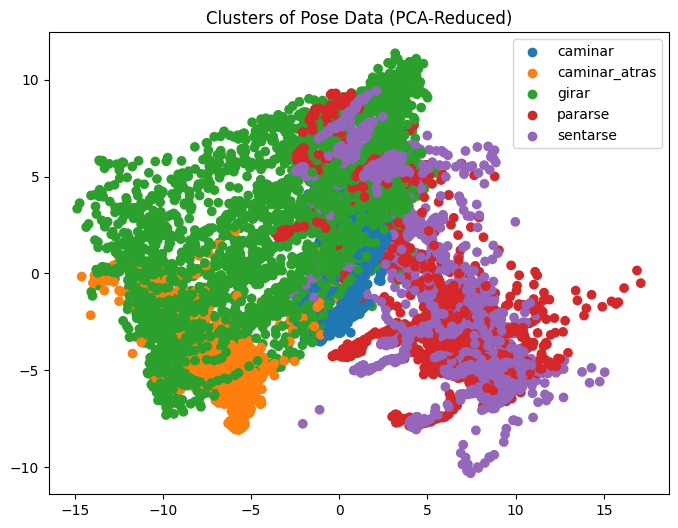

In [37]:
from sklearn.decomposition import PCA

labels = data['label']

data_features = data.drop(columns=['label'])

X = StandardScaler().fit_transform(data_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.title("Clusters of Pose Data (PCA-Reduced)")

for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=label)

plt.legend()
plt.show()

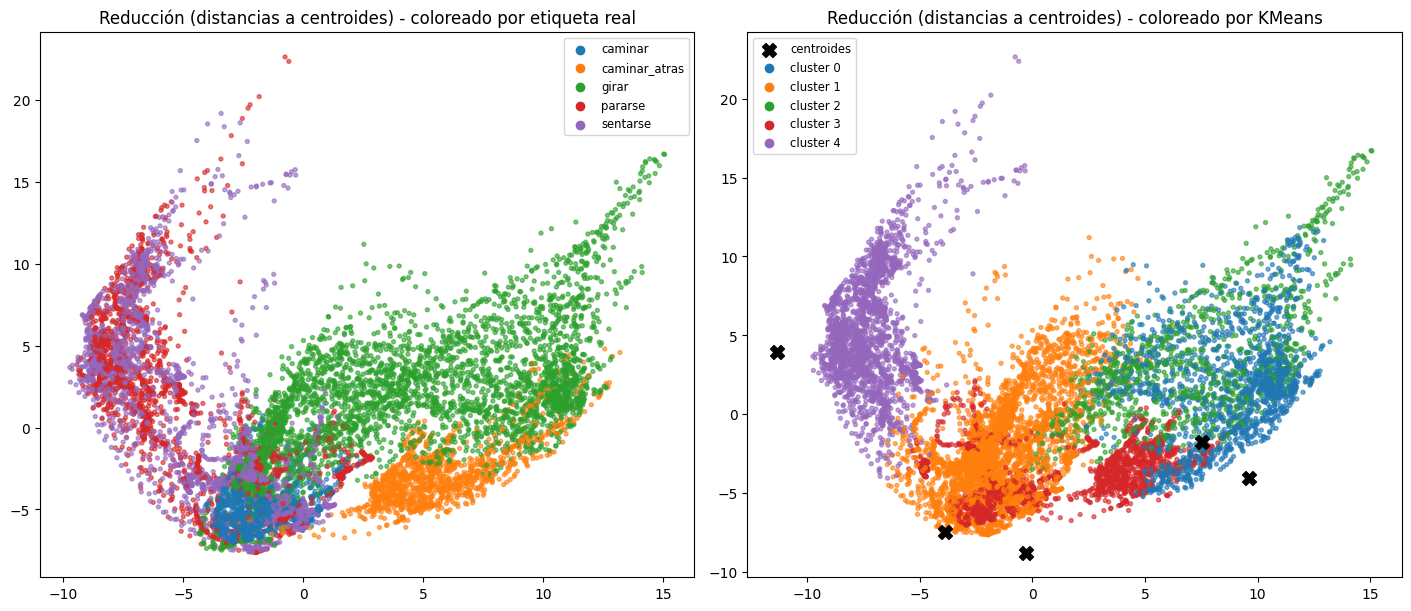

In [38]:
from sklearn.cluster import KMeans

n_clusters = len(unique_labels)

# Entrenar KMeans sobre X (ya estandarizado en la sesión)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)
kmeans.fit(X)
klabels = kmeans.labels_

# Obtener representación reducida: distancias a centroides (dim = n_clusters)
X_km = kmeans.transform(X)

# Reducir esas distancias a 2D para visualización con PCA
pca_km = PCA(n_components=2)
X_km_2d = pca_km.fit_transform(X_km)

# Centroides proyectados a 2D
# Nota: los centroides de KMeans están en el espacio original (99 dims).
# Primero obtenemos su representación en el espacio "distancias a centroides" usando kmeans.transform(...)
centroids_2d = pca_km.transform(kmeans.transform(kmeans.cluster_centers_))

# Plot: comparación visual entre etiquetas reales y clusters de KMeans sobre la reducción
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Izquierda: coloreado por etiqueta real
axes[0].scatter(X_km_2d[:, 0], X_km_2d[:, 1], c=[label_colors[l] for l in labels], s=8, alpha=0.6)
axes[0].set_title("Reducción (distancias a centroides) - coloreado por etiqueta real")
for lab, col in label_colors.items():
    axes[0].scatter([], [], color=col, label=lab)
axes[0].legend(loc='best', fontsize='small')

# Derecha: coloreado por cluster asignado por KMeans
cmap = plt.get_cmap('tab10')
cluster_colors = [cmap(i) for i in range(n_clusters)]
axes[1].scatter(X_km_2d[:, 0], X_km_2d[:, 1], c=[cluster_colors[i] for i in klabels], s=8, alpha=0.6)
# marcar centroides
axes[1].scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', s=100, marker='X', label='centroides')
for i, col in enumerate(cluster_colors):
    axes[1].scatter([], [], color=col, label=f'cluster {i}')
axes[1].set_title("Reducción (distancias a centroides) - coloreado por KMeans")
axes[1].legend(loc='best', fontsize='small')

plt.show()

# Filtrado suave

In [39]:
data['frame_id'] = data.groupby('label').cumcount()
data = data.sort_values(['label', 'frame_id'])

In [40]:
from scipy.signal import savgol_filter

window_size = 5
poly_order = 2 

for col in [c for c in data.columns if c.startswith(('x_', 'y_', 'z_'))]:
    data[col] = savgol_filter(data[col], window_size, poly_order)


In [41]:
for i in range(33):
    for axis in ['x', 'y', 'z']:
        col = f'{axis}_{i}'
        data[f'vel_{axis}_{i}'] = data[col].diff().fillna(0)


In [42]:
import numpy as np

def angle_3d(a, b, c):
    ba = a - b
    bc = c - b
    cosang = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cosang, -1.0, 1.0)))

angles = []
for idx in range(len(data)):
    a = np.array([data.loc[idx, f'{axis}_11'] for axis in ['x', 'y', 'z']])
    b = np.array([data.loc[idx, f'{axis}_13'] for axis in ['x', 'y', 'z']])
    c = np.array([data.loc[idx, f'{axis}_15'] for axis in ['x', 'y', 'z']])
    angles.append(angle_3d(a, b, c))

data['angle_brazo_derecho'] = angles


In [43]:
data['inclinacion_tronco'] = np.degrees(np.arctan2(
    (data['y_24'] + data['y_23'])/2 - (data['y_12'] + data['y_11'])/2,
    (data['z_24'] + data['z_23'])/2 - (data['z_12'] + data['z_11'])/2
))


# entrenamiento del clasificador de actividades

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

assert 'data' in globals(), "No encuentro 'data' en el notebook."
assert 'label' in data.columns, "La columna 'label' no existe en 'data'."

if 'encoder' not in globals():
    encoder = LabelEncoder()
y = encoder.fit_transform(data['label'])

X = data.drop(columns=['label']).select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = 'f1_macro'



## modelos supervisados

### RandomForestClassifier

In [45]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_param_dist = {
    "n_estimators": np.arange(150, 701, 50),
    "max_depth": [None] + list(np.arange(8, 41, 4)),
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7, 1.0],
    "class_weight": [None, "balanced"]
}
rf_search = RandomizedSearchCV(
    rf, rf_param_dist, n_iter=40, scoring=scoring, cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
rf_pred = rf_best.predict(X_test)

print("\n=== Random Forest ===")
print("Mejores hiperparámetros:", rf_search.best_params_)
print(f"F1-macro (CV best): {rf_search.best_score_:.4f}")
print(f"Accuracy (test): {accuracy_score(y_test, rf_pred):.4f} | F1-macro (test): {f1_score(y_test, rf_pred, average='macro'):.4f}")
print(classification_report(y_test, rf_pred, target_names=encoder.classes_))



Fitting 5 folds for each of 40 candidates, totalling 200 fits

=== Random Forest ===
Mejores hiperparámetros: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 36, 'class_weight': 'balanced'}
F1-macro (CV best): 0.9937
Accuracy (test): 0.9946 | F1-macro (test): 0.9940
               precision    recall  f1-score   support

      caminar       1.00      0.99      0.99       388
caminar_atras       1.00      0.98      0.99       328
        girar       0.99      1.00      1.00       985
      pararse       0.99      1.00      0.99       525
     sentarse       1.00      0.99      1.00       550

     accuracy                           0.99      2776
    macro avg       1.00      0.99      0.99      2776
 weighted avg       0.99      0.99      0.99      2776



## SVM

In [46]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])
svm_param_dist = {
    "svc__C": np.logspace(-2, 3, 20),
    "svc__gamma": np.logspace(-4, 0, 10),
    "svc__class_weight": [None, "balanced"]
}
svm_search = RandomizedSearchCV(
    svm_pipe, svm_param_dist, n_iter=40, scoring=scoring, cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
svm_search.fit(X_train, y_train)
svm_best = svm_search.best_estimator_
svm_pred = svm_best.predict(X_test)

print("\n=== SVM (RBF) ===")
print("Mejores hiperparámetros:", svm_search.best_params_)
print(f"F1-macro (CV best): {svm_search.best_score_:.4f}")
print(f"Accuracy (test): {accuracy_score(y_test, svm_pred):.4f} | F1-macro (test): {f1_score(y_test, svm_pred, average='macro'):.4f}")
print(classification_report(y_test, svm_pred, target_names=encoder.classes_))


Fitting 5 folds for each of 40 candidates, totalling 200 fits

=== SVM (RBF) ===
Mejores hiperparámetros: {'svc__gamma': 0.016681005372000592, 'svc__class_weight': None, 'svc__C': 1000.0}
F1-macro (CV best): 0.9721
Accuracy (test): 0.9766 | F1-macro (test): 0.9781
               precision    recall  f1-score   support

      caminar       0.99      0.98      0.99       388
caminar_atras       1.00      0.96      0.98       328
        girar       0.95      1.00      0.97       985
      pararse       0.99      0.95      0.97       525
     sentarse       0.99      0.96      0.97       550

     accuracy                           0.98      2776
    macro avg       0.98      0.97      0.98      2776
 weighted avg       0.98      0.98      0.98      2776



## XGBoost

In [47]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    tree_method="hist",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_param_dist = {
    "n_estimators": np.arange(200, 901, 50),
    "learning_rate": np.linspace(0.01, 0.3, 15),
    "max_depth": np.arange(3, 11),
    "subsample": np.linspace(0.6, 1.0, 9),
    "colsample_bytree": np.linspace(0.6, 1.0, 9),
    "min_child_weight": np.arange(1, 11),
    "reg_alpha": np.linspace(0.0, 1.0, 6),
    "reg_lambda": np.linspace(0.5, 2.0, 7)
}

xgb_search = RandomizedSearchCV(
    xgb, xgb_param_dist, n_iter=50, scoring=scoring, cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)

xgb_search.fit(X_train, y_train)

print("Best (CV):", xgb_search.best_params_)

xgb_best = XGBClassifier(
    **xgb_search.best_params_,
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    tree_method="hist",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_best.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

xgb_pred = xgb_best.predict(X_test)

print("\n=== XGBoost (refit con ES si callbacks disponibles) ===")
print(f"Accuracy (test): {accuracy_score(y_test, xgb_pred):.4f} | F1-macro (test): {f1_score(y_test, xgb_pred, average='macro'):.4f}")
print(classification_report(y_test, xgb_pred, target_names=encoder.classes_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best (CV): {'subsample': 0.75, 'reg_lambda': 2.0, 'reg_alpha': 0.4, 'n_estimators': 650, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.05142857142857143, 'colsample_bytree': 0.75}

=== XGBoost (refit con ES si callbacks disponibles) ===
Accuracy (test): 0.9964 | F1-macro (test): 0.9961
               precision    recall  f1-score   support

      caminar       0.99      1.00      1.00       388
caminar_atras       1.00      0.99      0.99       328
        girar       1.00      1.00      1.00       985
      pararse       1.00      1.00      1.00       525
     sentarse       1.00      1.00      1.00       550

     accuracy                           1.00      2776
    macro avg       1.00      1.00      1.00      2776
 weighted avg       1.00      1.00      1.00      2776



In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred, proba=None):
    metrics = {
        "Modelo": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1_macro": f1_score(y_true, y_pred, average='macro')
    }
    return metrics

metrics_df = pd.DataFrame([
    evaluate_model("RandomForest", y_test, rf_best.predict(X_test)),
    evaluate_model("SVM-RBF", y_test, svm_best.predict(X_test)),
    evaluate_model("XGBoost", y_test, xgb_best.predict(X_test))
])
metrics_df.set_index("Modelo", inplace=True)
print(metrics_df)


              Accuracy  Precision    Recall  F1_macro
Modelo                                               
RandomForest  0.994597   0.995623  0.992427  0.994001
SVM-RBF       0.976585   0.984758  0.972032  0.978062
XGBoost       0.996398   0.996673  0.995531  0.996094


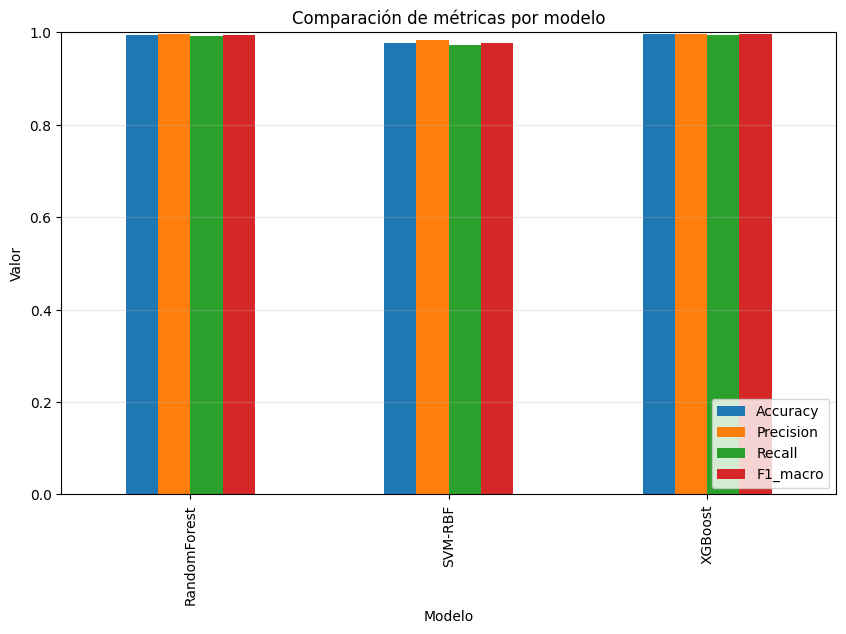

In [52]:
import matplotlib.pyplot as plt
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Comparación de métricas por modelo")
plt.ylabel("Valor")
plt.ylim(0,1)
plt.grid(axis='y', alpha=0.3)
plt.legend(loc='lower right')
plt.show()


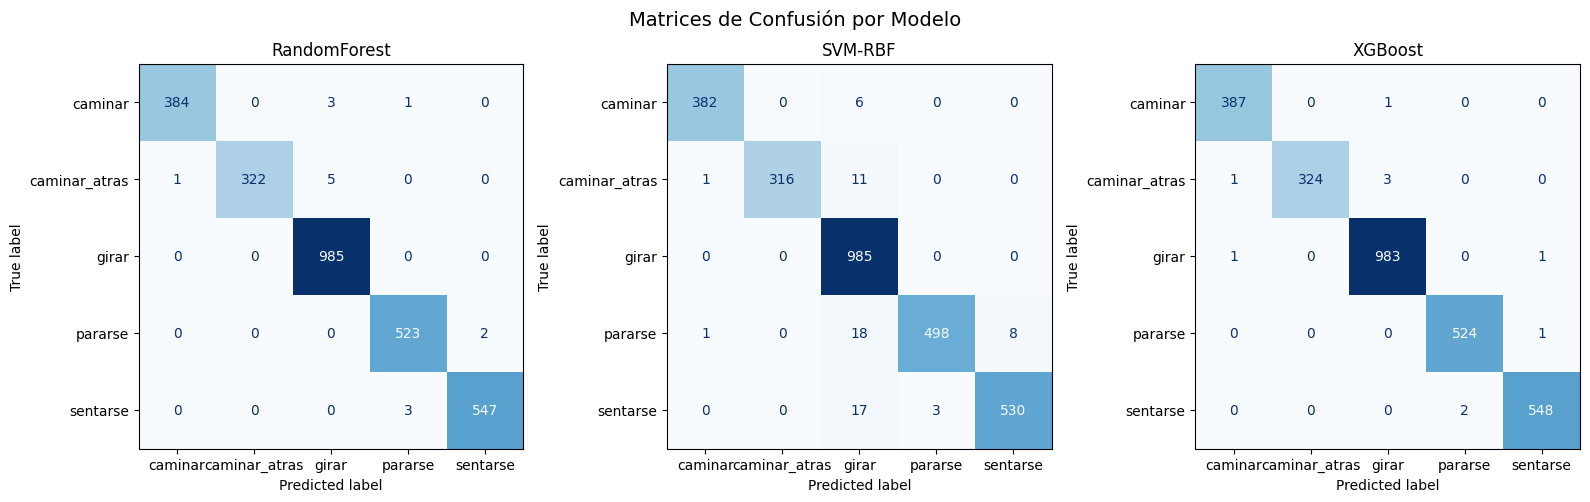

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(16,5))
models = {
    "RandomForest": rf_best,
    "SVM-RBF": svm_best,
    "XGBoost": xgb_best
}

for ax, (name, model) in zip(axes, models.items()):
    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test,
        display_labels=encoder.classes_,
        cmap="Blues",
        ax=ax,
        colorbar=False
    )
    ax.set_title(name)

plt.suptitle("Matrices de Confusión por Modelo", fontsize=14)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.metrics import classification_report
for name, model in models.items():
    print(f"\n=== Reporte detallado: {name} ===")
    print(classification_report(y_test, model.predict(X_test), target_names=encoder.classes_))



=== Reporte detallado: RandomForest ===
               precision    recall  f1-score   support

      caminar       1.00      0.99      0.99       388
caminar_atras       1.00      0.98      0.99       328
        girar       0.99      1.00      1.00       985
      pararse       0.99      1.00      0.99       525
     sentarse       1.00      0.99      1.00       550

     accuracy                           0.99      2776
    macro avg       1.00      0.99      0.99      2776
 weighted avg       0.99      0.99      0.99      2776


=== Reporte detallado: SVM-RBF ===
               precision    recall  f1-score   support

      caminar       0.99      0.98      0.99       388
caminar_atras       1.00      0.96      0.98       328
        girar       0.95      1.00      0.97       985
      pararse       0.99      0.95      0.97       525
     sentarse       0.99      0.96      0.97       550

     accuracy                           0.98      2776
    macro avg       0.98      0.97    

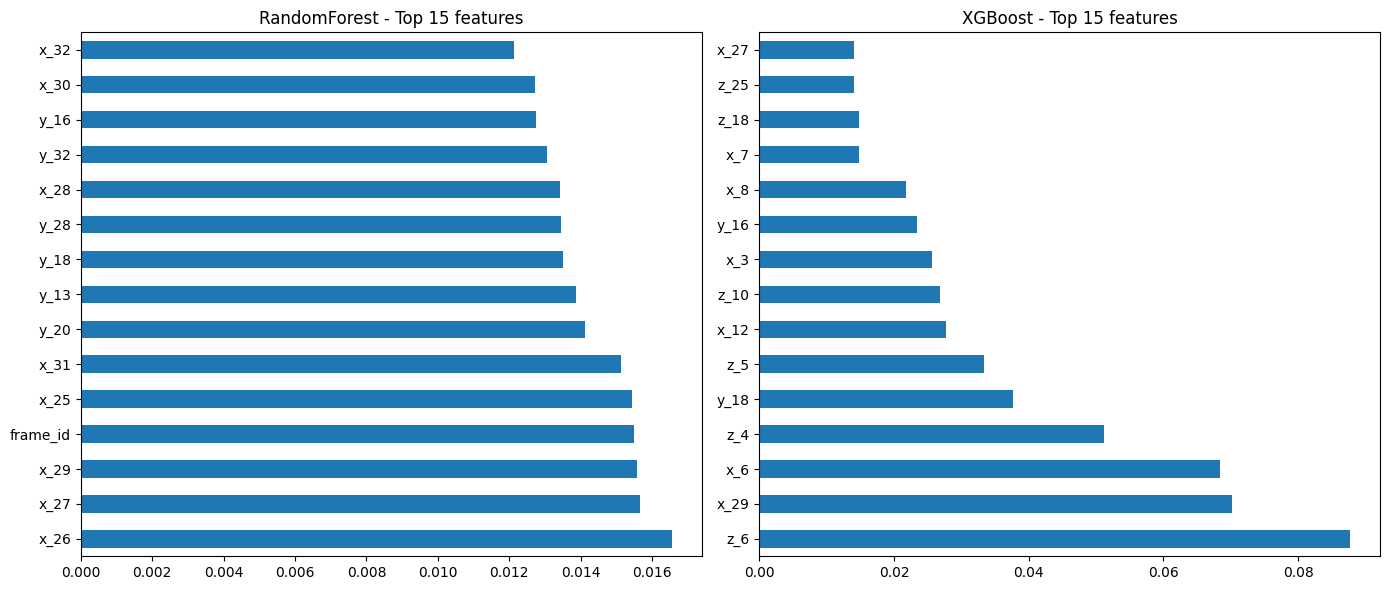

In [55]:
importances_rf = rf_best.feature_importances_
importances_xgb = xgb_best.feature_importances_

rf_top = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False).head(15)
xgb_top = pd.Series(importances_xgb, index=X.columns).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(1,2, figsize=(14,6))
rf_top.plot(kind='barh', ax=ax[0], title='RandomForest - Top 15 features')
xgb_top.plot(kind='barh', ax=ax[1], title='XGBoost - Top 15 features')
plt.tight_layout()
plt.show()
